In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Task 1: Data Pre-processing

First, we need to download the dataset from the provided link and import the necessary libraries. Here's an example of how you can read and preprocess the dataset using Python:

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# New Section

In [7]:
# Read the dataset
data = pd.read_csv('/content/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# Check the data
print(data.head())


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [8]:
print(data.tail())

     Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX


In [9]:
data.shape

(200, 6)

In [10]:
data.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [11]:
data.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [12]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [14]:
data.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [17]:
data.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [18]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [19]:
data.corr()

<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


VISUALIZATION

Unvariate Analysis

In [20]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


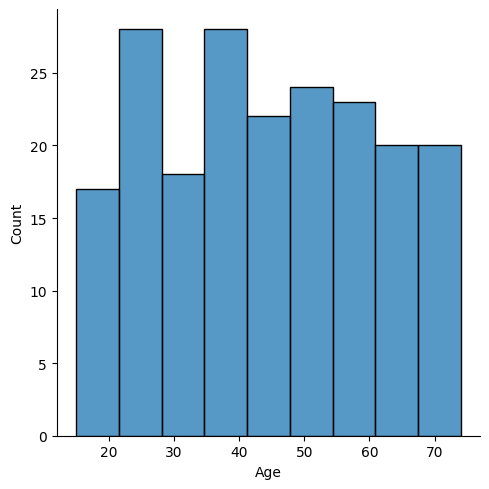

In [21]:
sns.displot(data.Age)

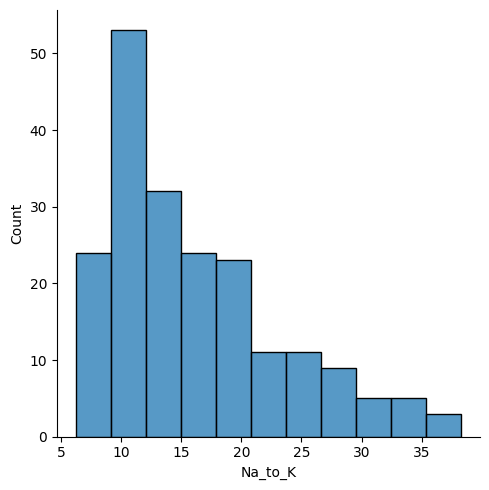

In [22]:
sns.displot(data.Na_to_K)

<function matplotlib.pyplot.show(close=None, block=None)>

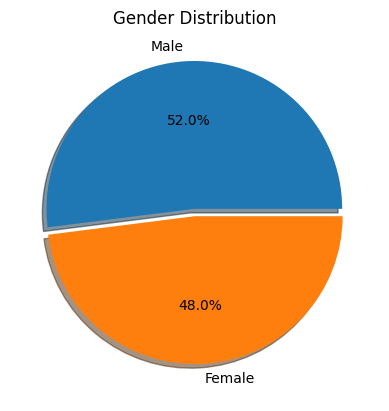

In [23]:
plt.pie(data.Sex.value_counts(),[0.05,0],labels=["Male","Female"],autopct = "%1.1f%%",shadow=True)
plt.title("Gender Distribution")
plt.show

<Axes: ylabel='Drug'>

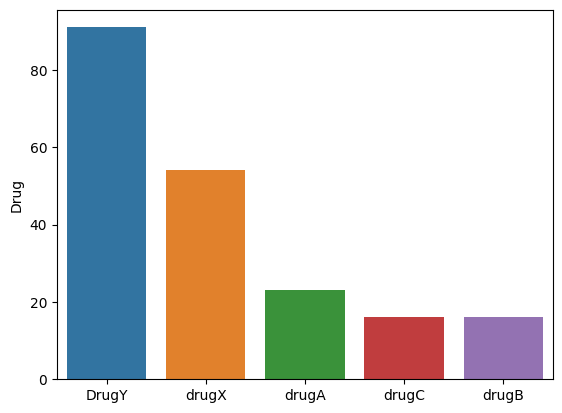

In [25]:
sns.barplot(x=data.Drug.value_counts().index,y=data.Drug.value_counts()) 

Bivariate Analysis

<Axes: xlabel='Age', ylabel='Na_to_K'>

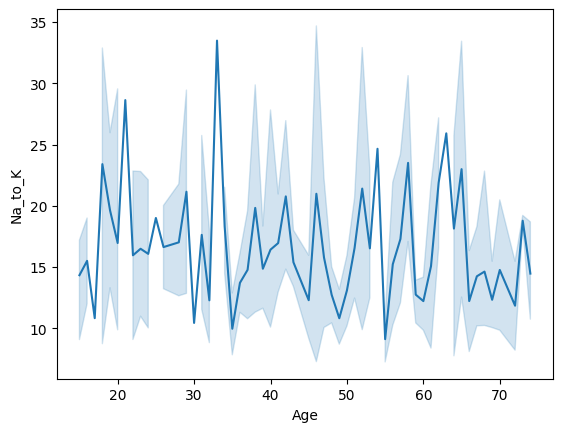

In [27]:
sns.lineplot(x=data.Age,y=data.Na_to_K)

<Axes: xlabel='Age', ylabel='Na_to_K'>

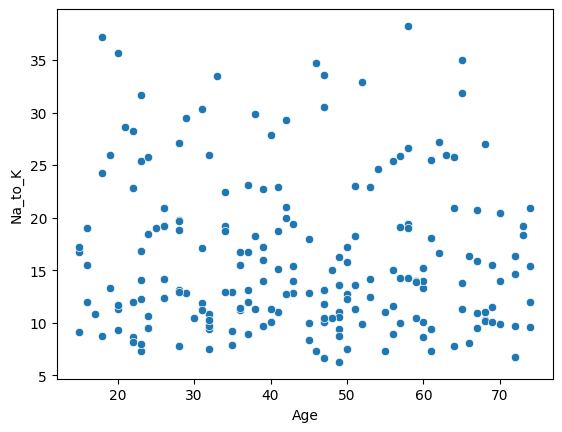

In [28]:
sns.scatterplot(x=data.Age,y=data.Na_to_K)

MultiVariate Analysis

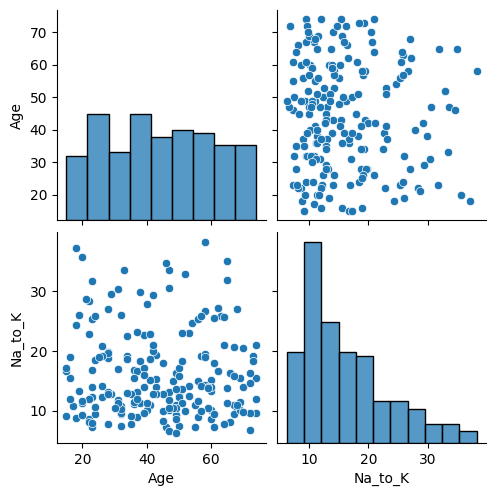

In [29]:
sns.pairplot(data)

<ipython-input-30-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

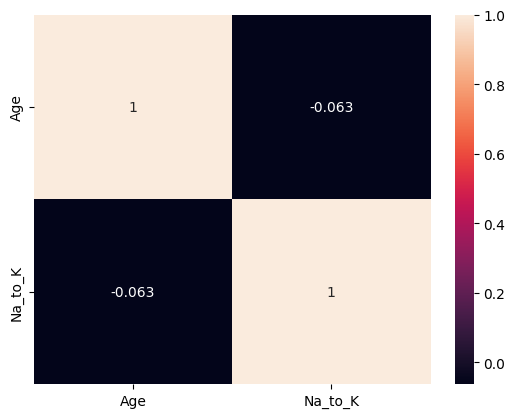

In [30]:
sns.heatmap(data.corr(),annot=True)

Outlier Detection and Replacement

Splitting Data into Dependent and Independent Data

In [31]:
x = data.iloc[:,0:5]
x.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [32]:
y = data.iloc[:,5:]
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [ ]:
# Perform data pre-processing
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol', 'Drug'])


In [ ]:
# Separate features and labels
X = data.drop('Drug_DrugY', axis=1)
y = data['Drug_DrugY']

In [ ]:
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting Data into Training and Testing Data

In [37]:
from sklearn.model_selection import train_test_split

In [41]:
# Split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [42]:
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,F,HIGH,NORMAL,19.161
47,68,M,LOW,HIGH,10.291
94,56,M,LOW,HIGH,15.015
14,50,F,NORMAL,HIGH,12.703
41,58,F,HIGH,NORMAL,14.239


In [43]:
ytrain.head()

,Drug
77,DrugY
47,drugC
94,DrugY
14,drugX
41,drugB


In [44]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
23,48,F,LOW,HIGH,15.036
182,20,F,LOW,NORMAL,11.686
172,39,F,NORMAL,NORMAL,17.225
21,63,M,NORMAL,HIGH,25.917
63,45,M,LOW,NORMAL,8.370


In [45]:
ytest.head()

,Drug
23,DrugY
182,drugX
172,DrugY
21,DrugY
63,drugX


Encoding Categorical Data

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,0,HIGH,NORMAL,19.161
47,68,1,LOW,HIGH,10.291
94,56,1,LOW,HIGH,15.015
14,50,0,NORMAL,HIGH,12.703
41,58,0,HIGH,NORMAL,14.239


In [48]:
xtest['Sex'] = le.transform(xtest['Sex'])
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
23,48,0,LOW,HIGH,15.036
182,20,0,LOW,NORMAL,11.686
172,39,0,NORMAL,NORMAL,17.225
21,63,1,NORMAL,HIGH,25.917
63,45,1,LOW,NORMAL,8.370


In [49]:
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,0,0,NORMAL,19.161
47,68,1,1,HIGH,10.291
94,56,1,1,HIGH,15.015
14,50,0,2,HIGH,12.703
41,58,0,0,NORMAL,14.239


In [50]:
xtest['BP'] = le.transform(xtest['BP'])
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
23,48,0,1,HIGH,15.036
182,20,0,1,NORMAL,11.686
172,39,0,2,NORMAL,17.225
21,63,1,2,HIGH,25.917
63,45,1,1,NORMAL,8.370


In [52]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,0,0,1,19.161
47,68,1,1,0,10.291
94,56,1,1,0,15.015
14,50,0,2,0,12.703
41,58,0,0,1,14.239


In [53]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
23,48,0,1,0,15.036
182,20,0,1,1,11.686
172,39,0,2,1,17.225
21,63,1,2,0,25.917
63,45,1,1,1,8.370


In [54]:
ytrain['Drug'] = le.fit_transform(ytrain['Drug'])
ytrain.head()

,Drug
77,0
47,3
94,0
14,4
41,2


In [55]:
ytest['Drug'] = le.transform(ytest['Drug'])
ytest.head()

,Drug
23,0
182,4
172,0
21,0
63,4


In [51]:
# Print the shapes of the datasets
print("Shape of X_train:", xtrain.shape)
print("Shape of X_test:", xtest.shape)
print("Shape of y_train:", ytrain.shape)
print("Shape of y_test:", ytest.shape)

Shape of X_train: (160, 5)
Shape of X_test: (40, 5)
Shape of y_train: (160, 1)
Shape of y_test: (40, 1)


Task 2: Build the ANN Model

To build an Artificial Neural Network (ANN) model with at least three hidden layers, we'll use the Keras library, which is a high-level neural networks API. Here's an example of how to construct the model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))  # Hidden layer 1
model.add(Dense(64, activation='relu'))  # Hidden layer 2
model.add(Dense(32, activation='relu'))  # Hidden layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 1s 59ms/step - loss: 0.6945 - accuracy: 0.5188 - val_loss: 0.6462 - val_accuracy: 0.8500
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6270 - accuracy: 0.9062 - val_loss: 0.5812 - val_accuracy: 0.9750
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 0.5566 - accuracy: 0.9625 - val_loss: 0.4908 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.4621 - accuracy: 0.9875 - val_loss: 0.3868 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.3528 - accuracy: 0.9937 - val_loss: 0.2755 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 0.2411 - accuracy: 0.9937 - val_loss: 0.1710 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1424 - accuracy: 0.9937 - val_loss: 0.0909 - val_accuracy: 1.0000
Epoch 8/10
5/5 [============

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainable params: 0
_________________________________________________________________


Task 3: Test the Model with Random Data

To test the model with random data, you can generate a random sample of features and pass it to the trained model for prediction. Here's an example:

In [ ]:
# Generate random test data
random_data = np.random.randn(1, X.shape[1])

In [ ]:
# Generate random test data
random_data = np.random.randn(1, X.shape[1])
random_data[0, 0] = (random_data[0, 0] - data['Age'].mean()) / data['Age'].std()
random_data[0, 4] = (random_data[0, 4] - data['Na_to_K'].mean()) / data['Na_to_K'].std()


In [ ]:
# Predict the class/category for the random data
prediction = model.predict(random_data)
class_label = 'Drug_DrugY' if prediction > 0.5 else 'Not Drug_DrugY'

1/1 [==============================] - 0s 96ms/step


In [ ]:
# Print the prediction result
print("Random Data:")
print(random_data)
print("Prediction Result:")
print("Class Label:", class_label)
print("Prediction Probability:", prediction)

Random Data:
[[-0.02314238  0.12158377  1.29618906  0.5746794   0.12368152 -0.64002294
  -0.90936283 -0.49105585 -0.45863481 -0.96805762  1.71013701 -0.50413643
  -0.78334837]]
Prediction Result:
Class Label: Drug_DrugY
Prediction Probability: [[0.8673062]]
